In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pyecharts import options as opts
from pyecharts.charts import WordCloud #词云库
from pyecharts.globals import SymbolType

import re # 正则表达式库
import collections # 词频统计库
import jieba # 结巴分词
from PIL import Image # 图像处理库


In [2]:
# 设置画图类型与尺寸
sns.set_palette(sns.color_palette('deep'))
sns.set(rc = {'figure.figsize': (9, 5)})
sns.set_style('whitegrid')

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#读取文件，查看前五行
df = pd.read_csv('bestsellers with categories.csv')
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [5]:
#查看数据特征
df.shape
# 列数据信息
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [6]:
# 检查缺失值
df.isnull().sum()


Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [7]:
# 数据整体特征，describe函数参数包括数量，平均值，最小/大值，标准差，4分位数
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [8]:
#查看所有价格并排序
np.sort(df['Price'].unique())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        27,  28,  30,  32,  36,  39,  40,  42,  46,  52,  53,  54,  82,
       105], dtype=int64)

In [9]:
# 上一步中价格为0的数据为免费读物，查看这些行
df[df['Price']==0]

,Name,Author,User Rating,Reviews,Price,Year,Genre
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
116,Frozen (Little Golden Book),RH Disney,4.7,3642,0,2014,Fiction
193,JOURNEY TO THE ICE P,RH Disney,4.6,978,0,2014,Fiction
219,Little Blue Truck,Alice Schertle,4.9,1884,0,2014,Fiction
358,The Constitution of the United States,Delegates of the Constitutional,4.8,2774,0,2016,Non Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction
461,The Short Second Life of Bree Tanner: An Eclip...,Stephenie Meyer,4.6,2122,0,2010,Fiction
505,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2013,Fiction
506,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2014,Fiction


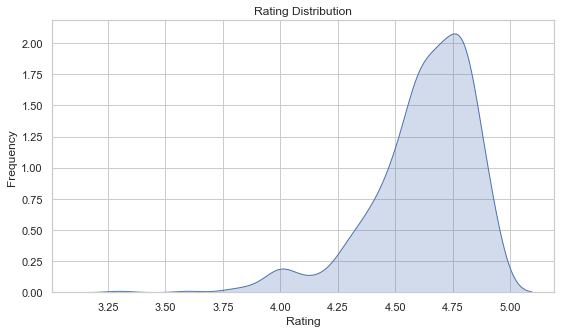

In [10]:
# 查看书籍评分的分布，这里使用seaborn核密度估计并可视化kdeplot
sns.kdeplot(df['User Rating'], shade = True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency');

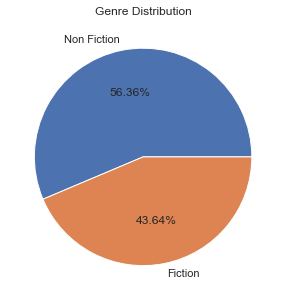

In [11]:
#考虑到书籍类型有两种，小说Fiction与非小说Non-Fiction，我们用pie查看哪种类型更受欢迎
plt.pie(df['Genre'].value_counts(), autopct = '%1.2f%%', labels = df['Genre'].value_counts().index)
plt.title('Genre Distribution');

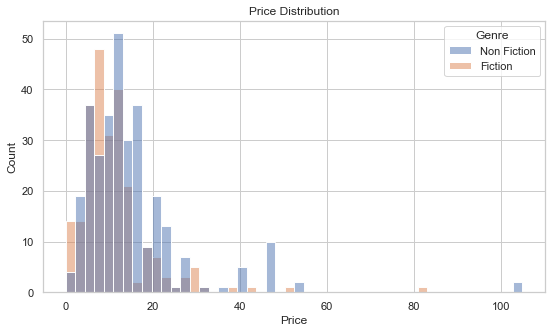

In [12]:
# 查看价格分布，这里使用histplot直方图
plt.title('Price Distribution')
sns.histplot(x = 'Price', hue = 'Genre', data = df);

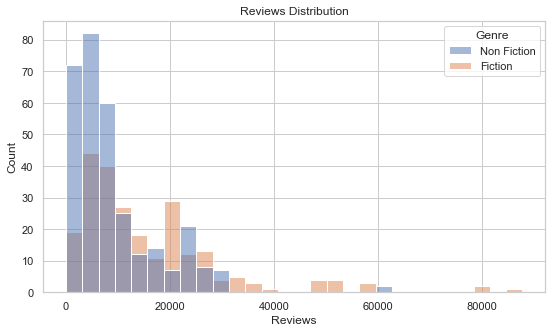

In [13]:
# 查看评论分布，同样使用histplot直方图
plt.title('Reviews Distribution')
sns.histplot(x = 'Reviews', hue = 'Genre', data = df);

In [14]:
# 查看作者的上榜次数，选取TOP10
most_books = df['Author'].value_counts().head(10)
most_books

Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
Dr. Seuss                              9
Gallup                                 9
Rob Elliott                            8
Stephen R. Covey                       7
Stephenie Meyer                        7
Name: Author, dtype: int64

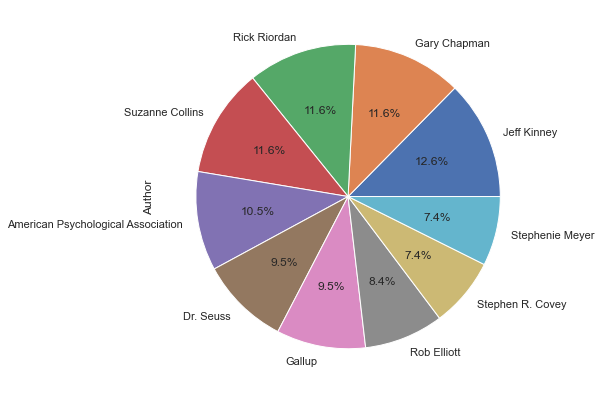

In [15]:
# 使用pie图可视化结果
most_books.plot(kind = 'pie', autopct = '%1.1f%%', figsize = (7, 7));


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '3.3'),
  Text(1, 0, '3.6'),
  Text(2, 0, '3.8'),
  Text(3, 0, '3.9'),
  Text(4, 0, '4.0'),
  Text(5, 0, '4.1'),
  Text(6, 0, '4.2'),
  Text(7, 0, '4.3'),
  Text(8, 0, '4.4'),
  Text(9, 0, '4.5'),
  Text(10, 0, '4.6'),
  Text(11, 0, '4.7'),
  Text(12, 0, '4.8'),
  Text(13, 0, '4.9')])

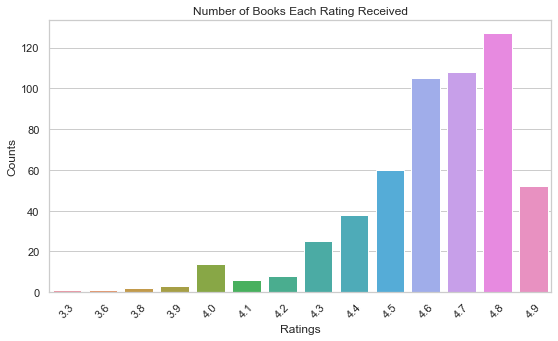

In [16]:
# 查看每个评分的书籍数量，使用条形图
sns.barplot(df['User Rating'].value_counts().index, df['User Rating'].value_counts())
plt.title('Number of Books Each Rating Received')
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.xticks(rotation = 45) #直接进行一个倾斜的设置


Text(0, 0.5, 'No. of Ratings')

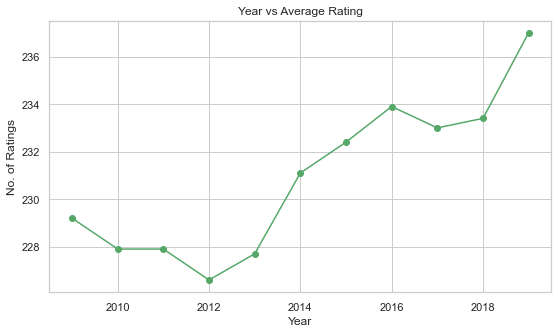

In [17]:
# 看一下哪一年的读者比较刁钻，评分数量按年进行比较，使用折线图
df.groupby('Year')['User Rating'].sum().plot(marker = 'o', c = 'g')
plt.title('Year vs Average Rating')
plt.xlabel('Year')
plt.ylabel('No. of Ratings')


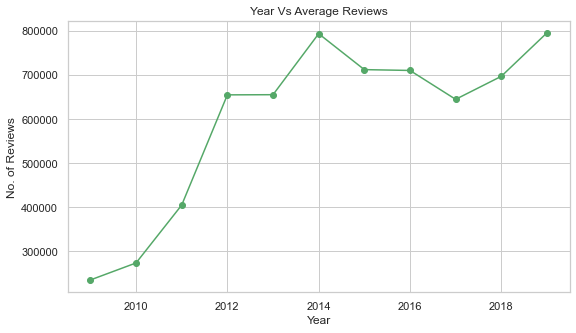

In [18]:
# 看一看哪一年的评价最高，使用折线图
df.groupby('Year')['Reviews'].sum().plot(marker = 'o', c = 'g')
plt.title('Year Vs Average Reviews')
plt.xlabel('Year')
plt.ylabel('No. of Reviews');

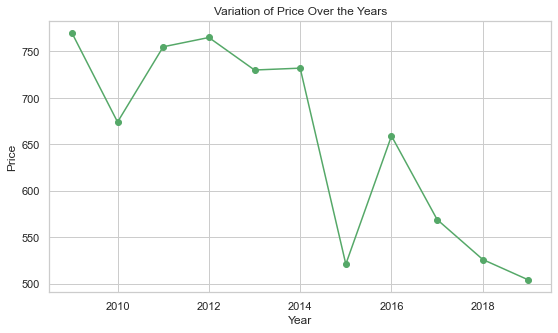

In [19]:
#看一看大家这个对书籍价格有没有更容易接受，价格按年分布
df.groupby('Year')['Price'].sum().plot(marker = 'o', c = 'g')
plt.title('Variation of Price Over the Years')
plt.xlabel('Year')
plt.ylabel('Price');

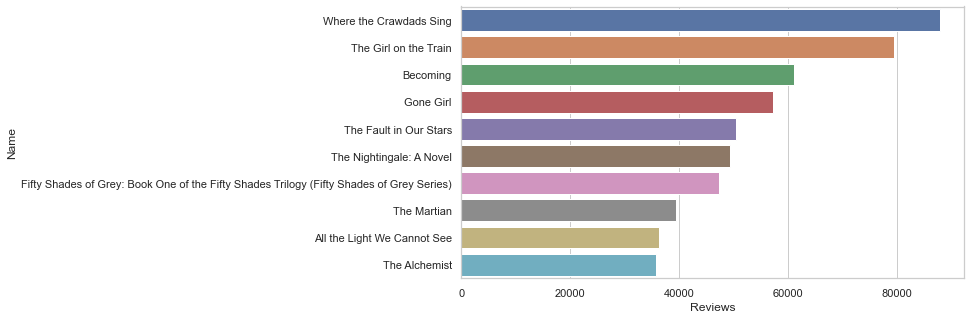

In [20]:
#查看评论数最多的书，使用横向条形图
top_reviews = df.nlargest(20, ['Reviews'])
sns.barplot(top_reviews['Reviews'], top_reviews['Name']);


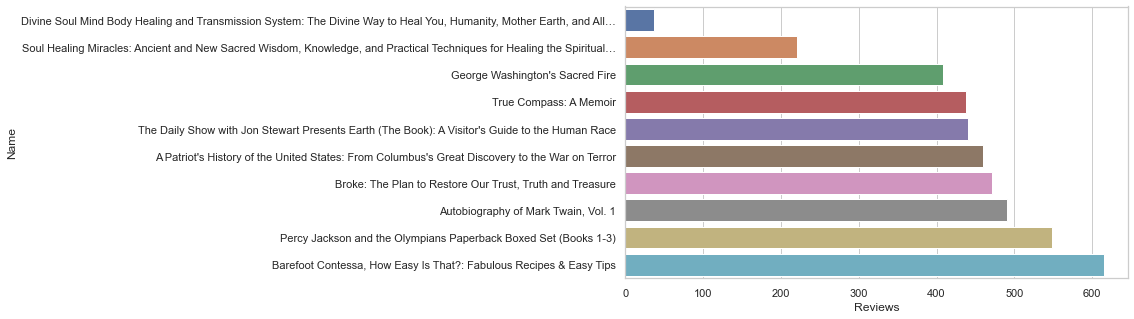

In [21]:
#查看评论数最少的书，同样使用横向条形图
lowest_reviews = df.nsmallest(10, ['Reviews'])
sns.barplot(lowest_reviews['Reviews'], lowest_reviews['Name']);


In [22]:
#查看评价最差的前十本书
worst = df.sort_values('User Rating').head(10)
worst


,Name,Author,User Rating,Reviews,Price,Year,Genre
353,The Casual Vacancy,J.K. Rowling,3.3,9372,12,2012,Fiction
132,Go Set a Watchman: A Novel,Harper Lee,3.6,14982,19,2015,Fiction
106,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2012,Fiction
107,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2013,Fiction
393,The Goldfinch: A Novel (Pulitzer Prize for Fic...,Donna Tartt,3.9,33844,20,2014,Fiction
22,Allegiant,Veronica Roth,3.9,6310,13,2013,Fiction
392,The Goldfinch: A Novel (Pulitzer Prize for Fic...,Donna Tartt,3.9,33844,20,2013,Fiction
364,The Elegance of the Hedgehog,Muriel Barbery,4.0,1859,11,2009,Fiction
137,Gone Girl,Gillian Flynn,4.0,57271,9,2014,Fiction
136,Gone Girl,Gillian Flynn,4.0,57271,10,2013,Fiction


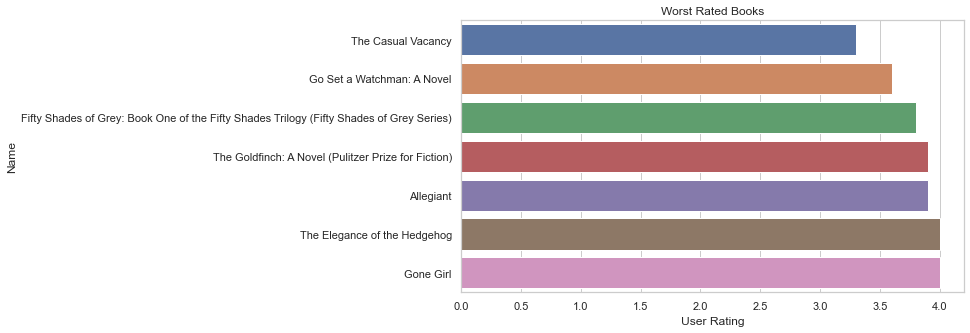

In [23]:
# 将他们可视化，使用横向条形图，只显示7本是因为书名有重复（不同年份出版）
plt.title('Worst Rated Books')
sns.barplot(y = worst['Name'], x = worst['User Rating']);


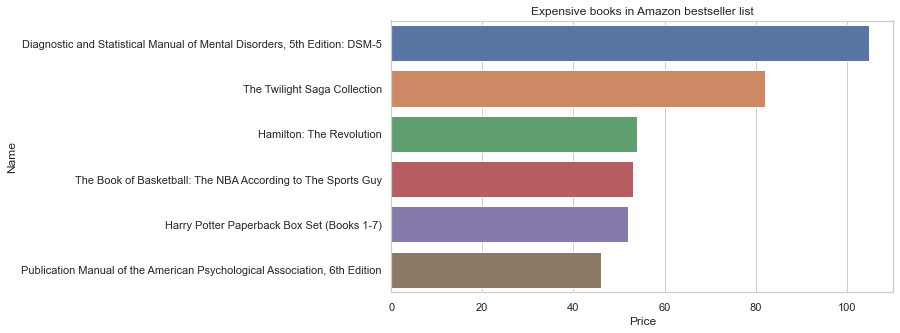

In [24]:
# 来看看最贵的那一批书，一本书80刀是认真的？
plt.title('Expensive books in Amazon bestseller list')
top_expensive = df.drop(df[df['Price'] < 1].index).sort_values('Price', ascending = False).head(10)
sns.barplot(y = top_expensive['Name'], x = top_expensive['Price']);


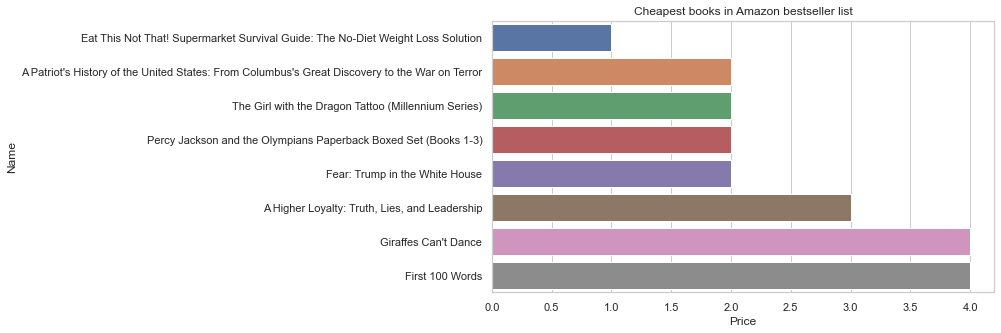

In [25]:
# 最便宜的一批书，当然要排除价格为0的读物
plt.title('Cheapest books in Amazon bestseller list')
cheapest = df[-df['Price'].isin([0])].sort_values('Price').head(10)
sns.barplot(y = cheapest['Name'], x = cheapest['Price']);


In [26]:
#当然我们最关心免费读物中哪些是最值得购买的，按读者评论排序显示
df.drop(df[df['Price'] > 0].index).sort_values('User Rating', ascending = False).head(10)


,Name,Author,User Rating,Reviews,Price,Year,Genre
219,Little Blue Truck,Alice Schertle,4.9,1884,0,2014,Fiction
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
358,The Constitution of the United States,Delegates of the Constitutional,4.8,2774,0,2016,Non Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction
505,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2013,Fiction
506,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2014,Fiction
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
508,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2016,Fiction
116,Frozen (Little Golden Book),RH Disney,4.7,3642,0,2014,Fiction


In [27]:
# 对于最畅销的作家，我们可以用词密度图来展示他们的受欢迎程度
df = pd.read_csv('bestsellers with categories.csv',usecols=[1])
#将名字列输出到txt文件
df.to_csv('result.txt',index=False,sep=' ',encoding='utf_8_sig')


In [28]:
# 读取文件
fn = open('result.txt','rt') # 打开文件
string_data = fn.read() # 读出整个文件
fn.close() # 关闭文件

# 文本预处理
pattern = re.compile(u'\t|\n|\.|-|:|;|\)|\(|\?|"') # 定义正则表达式匹配模式
string_data = re.sub(pattern, '', string_data) # 将符合模式的字符去除

# 文本分词
seg_list_exact = jieba.cut(string_data, cut_all = False) # 精确模式分词
object_list = []
remove_words = [u'的', u'，',u'和', u'是', u'随着', u'对于', u'对',u'等',u'能',u'都',u'。',u' ',u'、',u'中',u'在',u'了',
                u'通常',u'如果',u'我们',u'需要',u'艒'] # 自定义去除词库

for word in seg_list_exact: # 循环读出每个分词
    if word not in remove_words: # 如果不在去除词库中
        object_list.append(word) # 分词追加到列表

# 词频统计
word_counts = collections.Counter(object_list) # 对分词做词频统计
word_counts_top40 = word_counts.most_common(40) # 获取前40最高频的词
print (word_counts_top40) # 输出检查


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\24248\AppData\Local\Temp\jieba.cache
Loading model cost 0.668 seconds.
Prefix dict has been built successfully.
[('R', 15), ('AssociationAmerican', 10), ('Psychological', 10), ("'", 9), ('ChapmanGary', 9), ('O', 8), ('CollinsSuzanne', 8), ('L', 7), ('SeussDr', 7), ('J', 7), ('PilkeyDav', 6), ('ReillyBill', 6), ('ElliottRob', 6), ('CoveyStephen', 6), ('Miguel', 6), ('College', 6), ('CarleEric', 6), ('YoungSarah', 5), ('RuizDon', 5), ('LarssonStieg', 5), ('BoardThe', 5), ('JamesE', 4), ('PriddyRoger', 4), ('AndreaeGiles', 4), ('CarnegieDale', 4), ('LencioniPatrick', 4), ('Kond', 4), ('Winfield', 4), ('LeeHarper', 4), ('HillenbrandLaura', 4), ('PalacioR', 4), ('MartinGeorge', 3), ('CampbellRod', 3), ('RR', 3), ('CollinsJim', 3), ('Wise', 3), ('RowlingJK', 3), ('K', 3), ('D', 3), ('S', 3)]


In [29]:
c = (
    WordCloud()
    .add("", word_counts_top40, word_size_range=[20, 100], shape=SymbolType.DIAMOND)
    .set_global_opts(title_opts=opts.TitleOpts(title="WordCloud-shape-diamond"))
    #.render("wordcloud_diamond.html")
)
c.render_notebook()